<h1>PART B: Student Segmentation Clustering</h1>



<h2>Importing Libraries</h2>

<hr>

In [1]:
# Import pandas and numpy
import numpy as np
import pandas as pd

# Sklearn Libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples , pairwise_distances
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA

# Import visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Import warnings and ignore if warnings are shown
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.chdir('C:\\Users\\limso\\Downloads\\CA2\\datasets')

<h2>Load Dataset</h2>
<hr>

In [3]:
# Loading dataset
df = pd.read_csv('Student_Performance_dataset.csv')

df.head()

,Student_ID,Gender,Age,English_Score,Math_Score,Science_Score
0,1,Female,18,64.0,56.0,60
1,2,Female,12,89.0,71.0,97
2,3,Female,18,69.0,69.0,80
3,4,Female,17,60.0,72.0,97
4,5,Male,13,71.0,76.0,76


In [4]:
# Types of data in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Student_ID     1000 non-null   int64  
 1   Gender         1000 non-null   object 
 2   Age            1000 non-null   int64  
 3   English_Score  971 non-null    float64
 4   Math_Score     967 non-null    float64
 5   Science_Score  1000 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 47.0+ KB


In [5]:
# Shape of the dataset
df.shape

(1000, 6)

In [6]:
# Getting the number of null values 
df.isnull().sum()

Student_ID        0
Gender            0
Age               0
English_Score    29
Math_Score       33
Science_Score     0
dtype: int64

<b><u>Observation</u></b>


The shape of the dataset: (1000,6)
<br>
Datatypes of all features are numerical except Gender
<br>
There appears to be missing values in the dataset,specifically in the English_Score(29) & Math_Score(33) features


<h2>Univariate Analysis</h2>
<hr>

We will analyse the distribution of our numerical features: Age, English_Score , Math_Score , Science_Score
<br>
No need to analyse Student ID as it is not needed

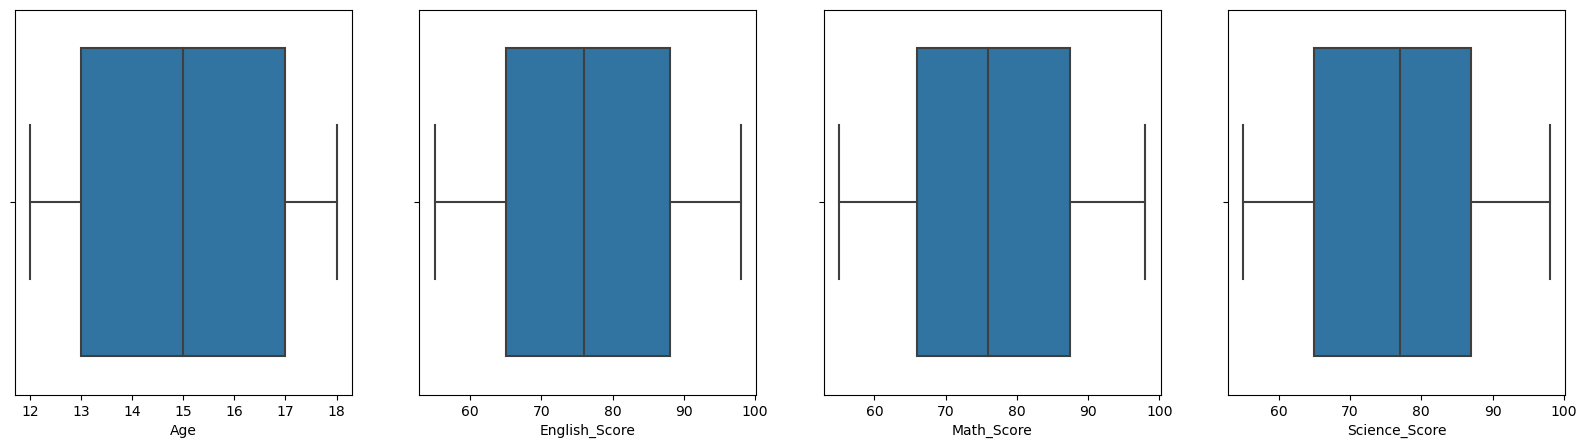

In [7]:
# Boxplot Analysis

fig, ax = plt.subplots(1, 4, figsize=(20, 5))

sns.boxplot(data=df, x='Age', ax=ax[0])
sns.boxplot(data=df, x='English_Score',ax=ax[1])
sns.boxplot(data=df, x='Math_Score',ax=ax[2])
sns.boxplot(data=df, x='Science_Score',ax=ax[3])

plt.show()

Age
<ul>
<li>Students have a median age of 15</li>
<li>There are no outliers</li>
</ul>

English_Score
<ul>
<li>Students have a median English score of around 76</li>
<li>There are no outliers</li>
</ul>

Math_Score
<ul>
<li>Students have a median Math score of around 76</li>
<li>There are no outliers</li>
</ul>

Math_Score
<ul>
<li>Students have a median Science score of around 78</li>
<li>There are no outliers</li>
</ul>



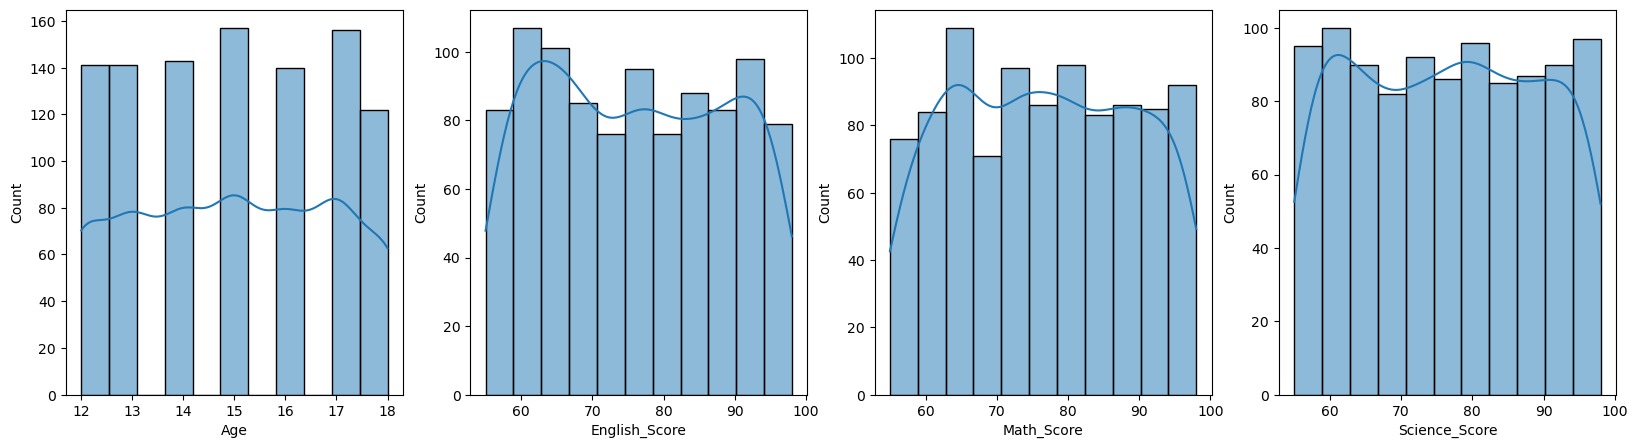

In [8]:
#Histogram Analysis
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

sns.histplot(data=df, x='Age', ax=ax[0], kde=True)
sns.histplot(data=df, x='English_Score',ax=ax[1], kde=True)
sns.histplot(data=df, x='Math_Score',ax=ax[2], kde=True)
sns.histplot(data=df, x='Science_Score',ax=ax[3], kde=True)

plt.show()



Age 

<ul>
<li>The distribution is even distributed</li>
</ul>

English_Score
<ul>
<li>The distribution is even distributed</li>
</ul>

Math_Score
<ul>
<li>The distribution is even distributed</li>
</ul>

Science_Score
<ul>
<li>The distribution is even distributed</li>
</ul>

<h2>Distribution of categorical feature</h2>

<hr>

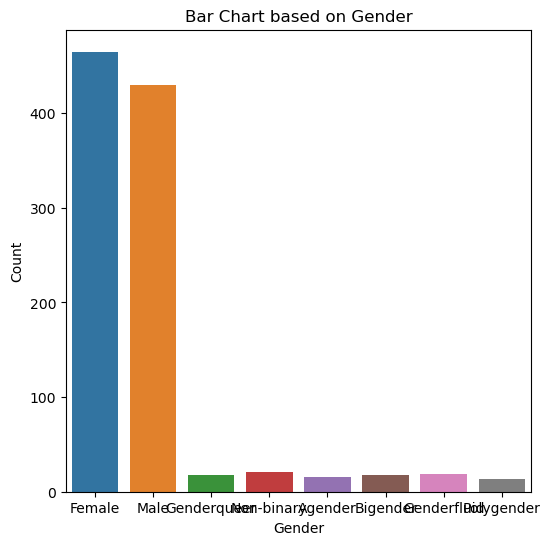

In [9]:

#Create the plot using matplotlib
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.countplot(data=df, x='Gender')

# Customise the plot
ax.set_ylabel('Count')
ax.set_xlabel('Gender')
ax.set_title('Bar Chart based on Gender')

# Show the plot
plt.show()

<h2>Bivariate Analysis</h2>

We will now analyse the correlation between all feature columns

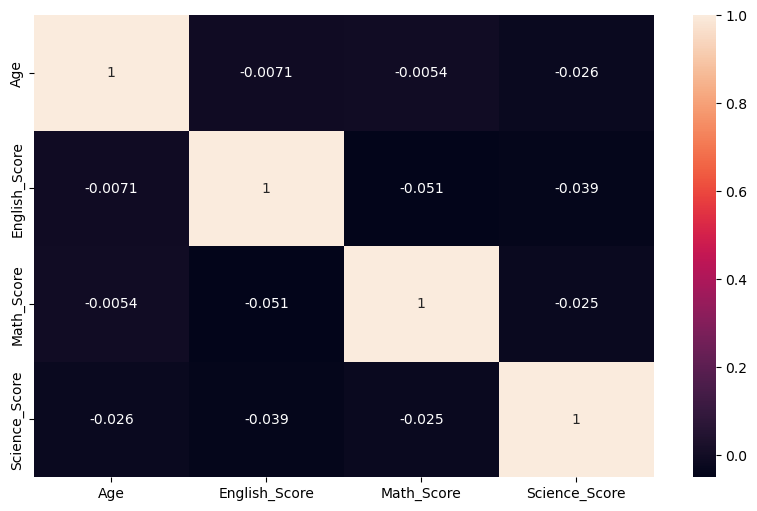

In [10]:
# plt.figure(figsize=(15,8))
# sns.heatmap(df_analyse[['Age', 'BMI','Cost ($)']].corr(), annot = True)
# plt.title("Relationship between numerical variables")
# plt.show()


plt.figure(figsize=(10, 6))
sns.heatmap(df[['Age','English_Score','Math_Score','Science_Score']].corr(), annot=True)
plt.show()  

<h3>Data Preprocessing & Feature Engineering</h3>
<hr>

### 1. Check for duplicate rows

In [11]:
# check for duplicate rows
df_noduplicate = df.drop_duplicates()
print(df.shape)
print(df_noduplicate.shape)

(1000, 6)
(1000, 6)


No duplicate rows

### 2. Categorical Encoding

In [12]:
# Getting dummy variables

df_dummies = pd.get_dummies(df[['Gender']], dtype='int')
df = pd.concat([df,df_dummies], axis=1)
df.head()

,Student_ID,Gender,Age,English_Score,Math_Score,Science_Score,Gender_Agender,Gender_Bigender,Gender_Female,Gender_Genderfluid,Gender_Genderqueer,Gender_Male,Gender_Non-binary,Gender_Polygender
0,1,Female,18,64.0,56.0,60,0,0,1,0,0,0,0,0
1,2,Female,12,89.0,71.0,97,0,0,1,0,0,0,0,0
2,3,Female,18,69.0,69.0,80,0,0,1,0,0,0,0,0
3,4,Female,17,60.0,72.0,97,0,0,1,0,0,0,0,0
4,5,Male,13,71.0,76.0,76,0,0,0,0,0,1,0,0


In [13]:
# Remove columns that are not needed
df.drop(['Student_ID','Gender'], axis=1,inplace=True)

df.head()

,Age,English_Score,Math_Score,Science_Score,Gender_Agender,Gender_Bigender,Gender_Female,Gender_Genderfluid,Gender_Genderqueer,Gender_Male,Gender_Non-binary,Gender_Polygender
0,18,64.0,56.0,60,0,0,1,0,0,0,0,0
1,12,89.0,71.0,97,0,0,1,0,0,0,0,0
2,18,69.0,69.0,80,0,0,1,0,0,0,0,0
3,17,60.0,72.0,97,0,0,1,0,0,0,0,0
4,13,71.0,76.0,76,0,0,0,0,0,1,0,0


### 3. Handling with null values in our data

Knowing that we have null values in our dataset , English_Score & Math_Score, we will need to handle with them 

<Axes: >

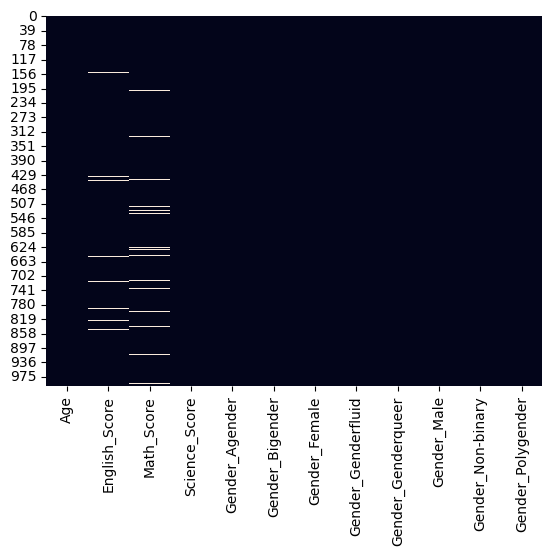

In [14]:
# Heatmap to show missing data in the dataset
sns.heatmap(df.isnull(), cbar=False)

In [15]:
# Printing the percentage of data missing 
print(f"Percentage of English_Score column missing: {round((df['English_Score'].isnull().sum()/df.shape[0])*100, 3)}%")
print(f"Percentage of Math_Score column missing: {round((df['Math_Score'].isnull().sum()/df.shape[0])*100, 3)}%")

Percentage of English_Score column missing: 2.9%
Percentage of Math_Score column missing: 3.3%


With handling the missing data, we will impute the data instead of dropping the missing values, this is because do not want to be losing out on valuable information

In [16]:
# Impute the missing values with median value 
df['English_Score'] = df['English_Score'].fillna(df['English_Score'].median())
df['Math_Score'] = df['Math_Score'].fillna(df['Math_Score'].median())

<Axes: >

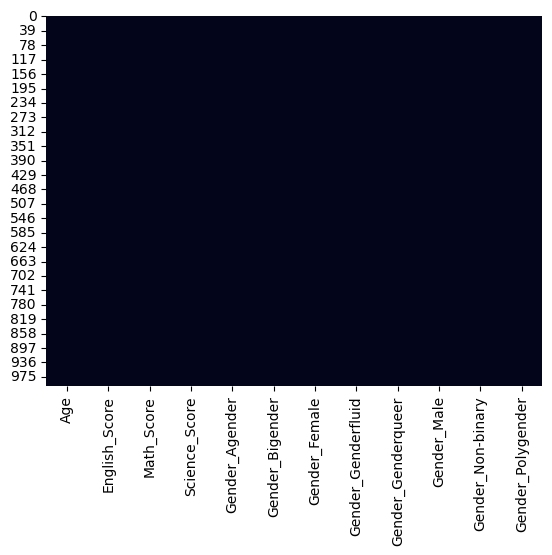

In [17]:
sns.heatmap(df.isnull(), cbar=False)

No more missing values!

### 4. Standard Scaling

Standard Scaling is a crucial preprocessing step for clustering models as it helps to ensure that the clustering results accurately reflect the underlying patterns in the data, making the clustering process more reliable and interpretable.

In [18]:
dfUnscaled = df.copy()


# Define scaler
scaler = StandardScaler()

# Scale the numerical data in our dataset
df[['Age', 'English_Score','Math_Score', 'Science_Score']] = scaler.fit_transform(df[['Age', 'English_Score','Math_Score', 'Science_Score']])

df.head()

,Age,English_Score,Math_Score,Science_Score,Gender_Agender,Gender_Bigender,Gender_Female,Gender_Genderfluid,Gender_Genderqueer,Gender_Male,Gender_Non-binary,Gender_Polygender
0,1.546825,-0.961257,-1.674327,-1.272918,0,0,1,0,0,0,0,0
1,-1.516194,1.026948,-0.457461,1.604172,0,0,1,0,0,0,0,0
2,1.546825,-0.563616,-0.619709,0.282266,0,0,1,0,0,0,0,0
3,1.036321,-1.279370,-0.376336,1.604172,0,0,1,0,0,0,0,0
4,-1.005691,-0.404560,-0.051838,-0.028771,0,0,0,0,0,1,0,0


In [19]:
df = df[['English_Score', 'Math_Score', 'Science_Score']]

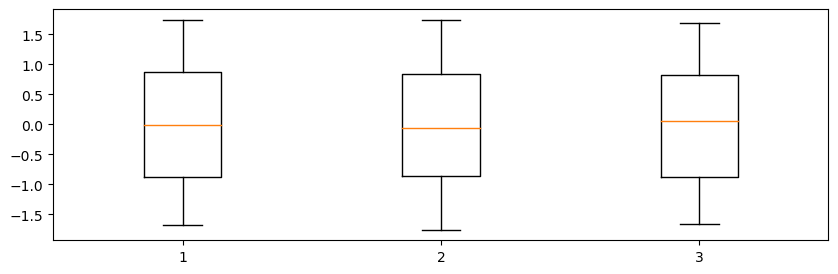

In [20]:
plt.figure(figsize=(10, 3))
plt.boxplot(df[['English_Score','Math_Score', 'Science_Score']])
plt.show()

<h3>Clustering</h3>
<hr>

### 1. K-Means Clustering

#### We need to find our Optimal K by using the following methods:
<ul>
<li>Elbow Method</li>
<li>Silhouette Method</li>
</ul>


In [21]:
inertia = []
score = []

for k in range(2,21):
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, n_init=10,random_state=0).fit(df)
    cluster_labels = kmeans.labels_

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(df, cluster_labels)
    print(f"For n_clusters = {k}, the average silhouette_score is : {silhouette_avg}")

    score.append(silhouette_avg)
    inertia.append(kmeans.inertia_)

For n_clusters = 2, the average silhouette_score is : 0.24507073388978048
For n_clusters = 3, the average silhouette_score is : 0.2477329888928492
For n_clusters = 4, the average silhouette_score is : 0.2699715369893826
For n_clusters = 5, the average silhouette_score is : 0.2704180259900597
For n_clusters = 6, the average silhouette_score is : 0.2801422042848388
For n_clusters = 7, the average silhouette_score is : 0.28134664414734145
For n_clusters = 8, the average silhouette_score is : 0.27721046432300384
For n_clusters = 9, the average silhouette_score is : 0.2812156322342833
For n_clusters = 10, the average silhouette_score is : 0.2812275798216152
For n_clusters = 11, the average silhouette_score is : 0.26825472119681437
For n_clusters = 12, the average silhouette_score is : 0.27386363969999156
For n_clusters = 13, the average silhouette_score is : 0.2714244146623873
For n_clusters = 14, the average silhouette_score is : 0.2643943758888338
For n_clusters = 15, the average silhouet

<h5>Elbow Method using Inertia</h5>

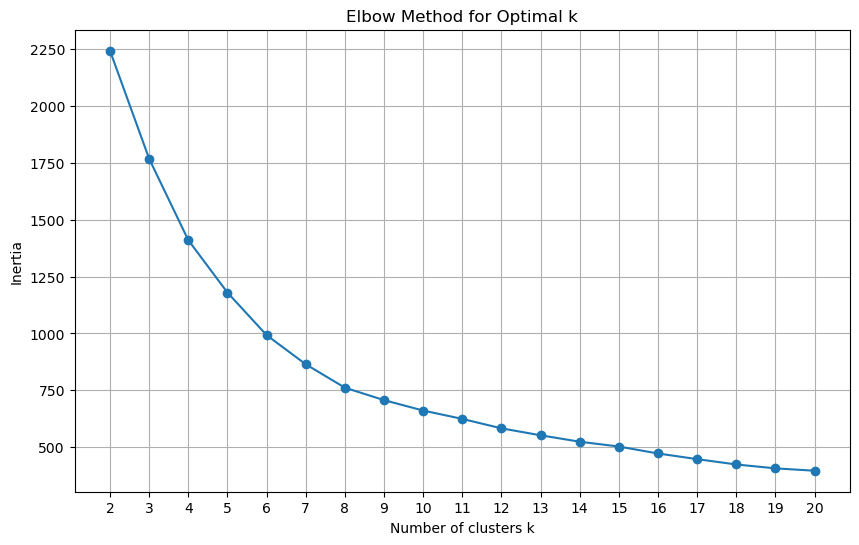

In [22]:
# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(2,21), inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.xticks(range(2,21))
plt.grid(True)
plt.show()

From the Elbow Method, we find the optimal k as 3

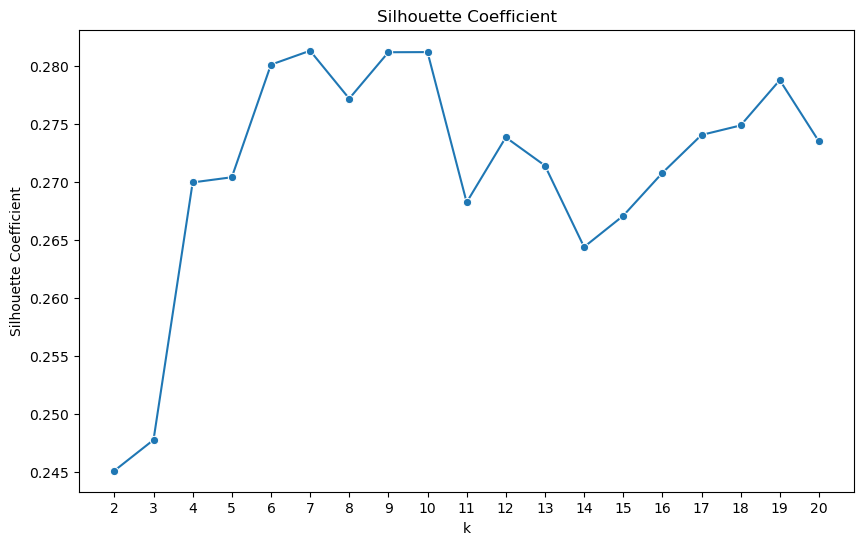

In [23]:
fig = plt.figure(figsize=(10, 6))

count = 0

plotX_value = []

for i in range(len(score)):
    if i == 0:
        count+=2
    else:
        count += 1
    plotX_value.append(count)

sns.lineplot(score, marker='o')
plt.title('Silhouette Coefficient')
plt.xlabel("k")
plt.ylabel("Silhouette Coefficient")
plt.xticks(np.arange(0, len(score)), plotX_value)
plt.show()

Silhouette coefficient is the highest at `k=7`

The Elbow Method did not produce a clear "elbow" point, thus we will use the optimal k obtained by the Silhouette Method instead

Silhouette Score(n=7): 0.28134664414734145


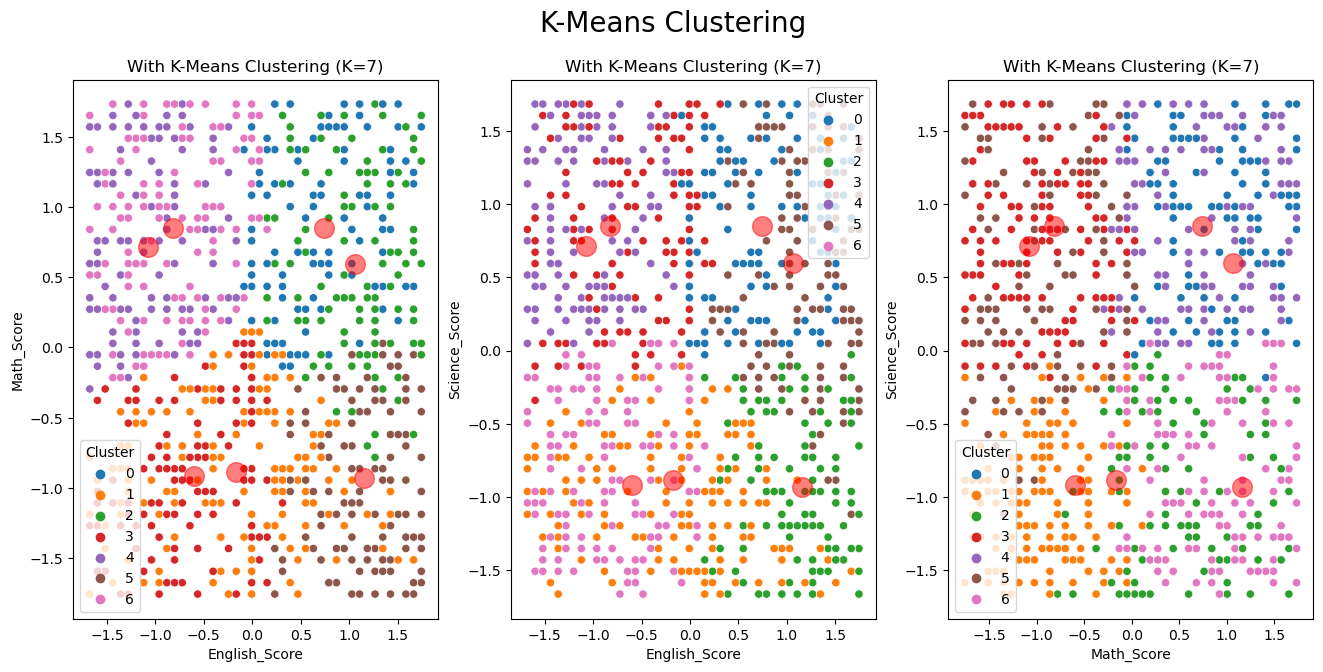

In [24]:
# Create copy of data
df1 = df.copy()

# Defining the model
kmeans = KMeans(n_clusters=7,n_init=10,random_state=0)

df1["Cluster"] = kmeans.fit_predict(df)

dfUnscaled["kmeans"] = kmeans.fit_predict(df)

# Print silhouette_score
print(f'Silhouette Score(n=7): {silhouette_score(df, df1["Cluster"])}')

# Plotting the clusters
fig, (ax1, ax2 , ax3) = plt.subplots(1, 3, figsize = (16,7))
plt.suptitle("K-Means Clustering", fontsize=20)

# Plotting Age against Spending Score
sns.scatterplot(x = 'English_Score', y='Math_Score', hue = df1["Cluster"], palette = 'tab10', data = df1, ax = ax1)
ax1.set_title("With K-Means Clustering (K=7)")

# Plotting Income (k$) against Spending Score
sns.scatterplot(x = 'English_Score', y='Science_Score', hue = df1["Cluster"], palette = 'tab10', data = df1, ax = ax2)
ax2.set_title("With K-Means Clustering (K=7)")

# Plotting Age against Spending Score
sns.scatterplot(x = 'Math_Score', y='Science_Score', hue = df1["Cluster"], palette = 'tab10', data = df1, ax = ax3)
ax3.set_title("With K-Means Clustering (K=7)")

centers = kmeans.cluster_centers_
ax1.scatter(centers[:, 0], centers[:, 1], c = 'red', s = 200, alpha = 0.5); # plot the x and y-coordinates
ax2.scatter(centers[:, 0], centers[:, 1], c = 'red', s = 200, alpha = 0.5); 
ax3.scatter(centers[:, 0], centers[:, 1], c = 'red', s = 200, alpha = 0.5); # plot the x and y-coordinates

plt.show()


### 2. Hierarchical Clustering

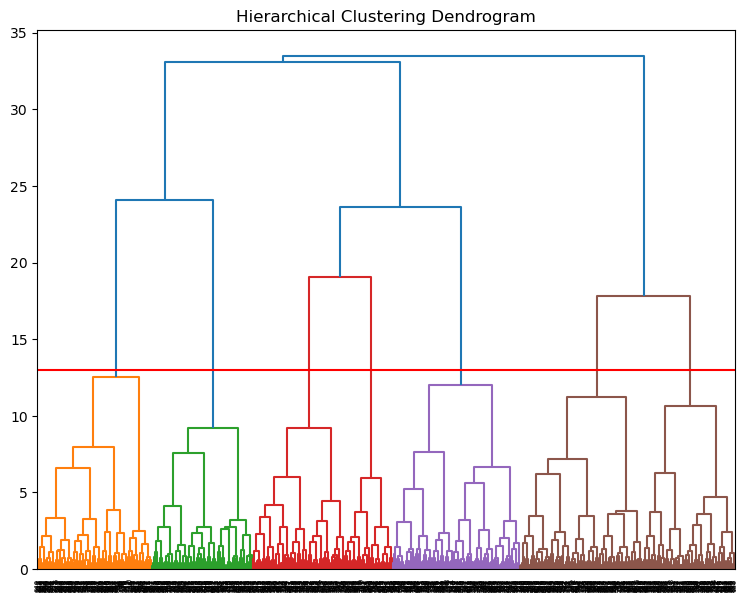

In [25]:
df2 = df.copy()

# Plotting the dendrogram for hierarchical clustering
linked = linkage(df2, 'ward')

plt.figure(figsize=( 9, 7))
dendrogram(linked,
           orientation='top',
           labels=df2.index,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.hlines(13, 0, 10000, colors = 'r') # Plotting the clutering line with optimal seperation
plt.show()


In [26]:

# Perform hierarchical clustering
agg_cluster = AgglomerativeClustering(n_clusters=7)

df2["Cluster"] = agg_cluster.fit_predict(df2)
dfUnscaled["hierarchical"] = agg_cluster.fit_predict(df2)

# Assign cluster labels
cluster_labels = agg_cluster.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(df, cluster_labels)
print("Silhouette Score(n=7):", silhouette_avg)

Silhouette Score(n=7): 0.23868060398273844


From the dendrogram constructed, we can see that the number of clusters to cut off at is 7.

### 3. GMM Clustering

Silhouette Score(n=7): 0.2616954040763687


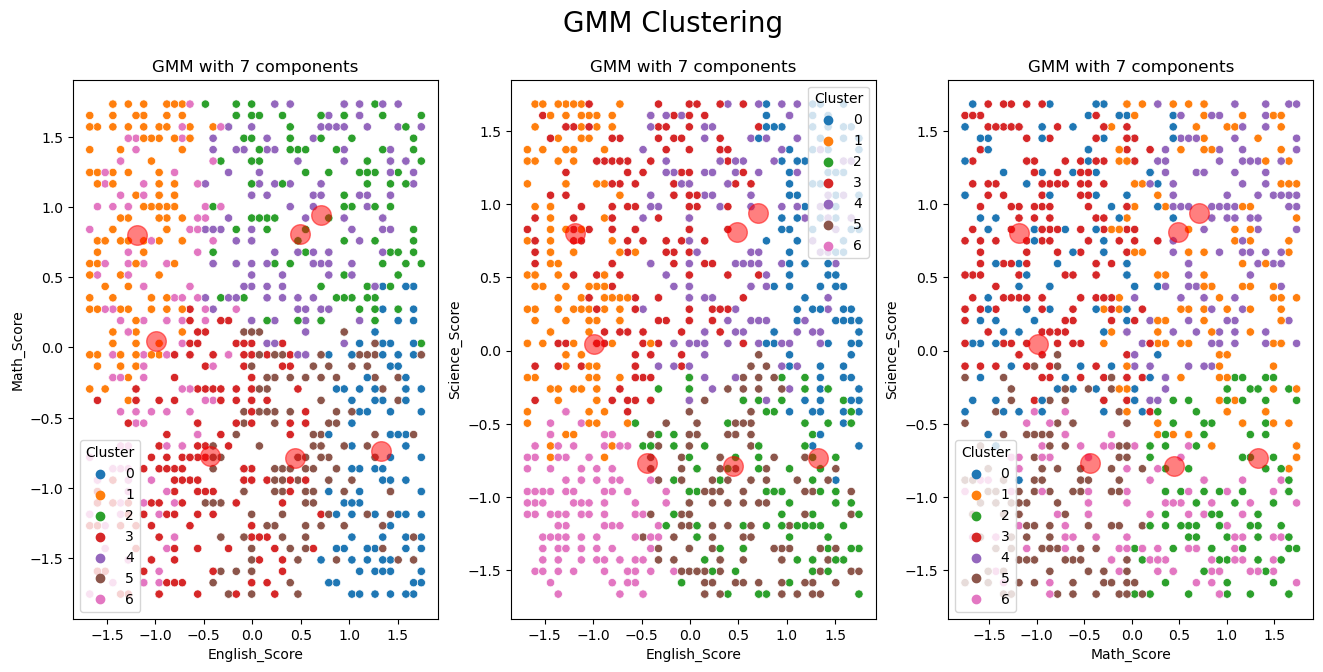

In [27]:
df3 = df.copy()

#Creating  GMM Model
gmm = GaussianMixture(n_components=7, random_state=0)

dfUnscaled["gmm"] = gmm.fit_predict(df3)

df3["Cluster"] = gmm.fit_predict(df3)


# Print silhouette_score
print(f'Silhouette Score(n=7): {silhouette_score(df, df3["Cluster"])}')

# Plotting the clusters
fig, (ax1, ax2 , ax3) = plt.subplots(1, 3, figsize = (16,7))
plt.suptitle("GMM Clustering", fontsize=20)

# Plotting Age against Spending Score
sns.scatterplot(x = 'English_Score', y='Math_Score', hue = df3["Cluster"], palette = 'tab10', data = df3, ax = ax1)
ax1.set_title("GMM with 7 components")

# Plotting Income (k$) against Spending Score
sns.scatterplot(x = 'English_Score', y='Science_Score', hue = df3["Cluster"], palette = 'tab10', data = df3, ax = ax2)
ax2.set_title("GMM with 7 components")

# Plotting Age against Spending Score
sns.scatterplot(x = 'Math_Score', y='Science_Score', hue = df3["Cluster"], palette = 'tab10', data = df3, ax = ax3)
ax3.set_title("GMM with 7 components")

ax1.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=200, alpha=0.5)  # gmm.means_ are the centers
ax2.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=200, alpha=0.5) 
ax3.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=200, alpha=0.5) 

plt.show()


<h3>Characteristics of Student Clusters</h3>
<hr>

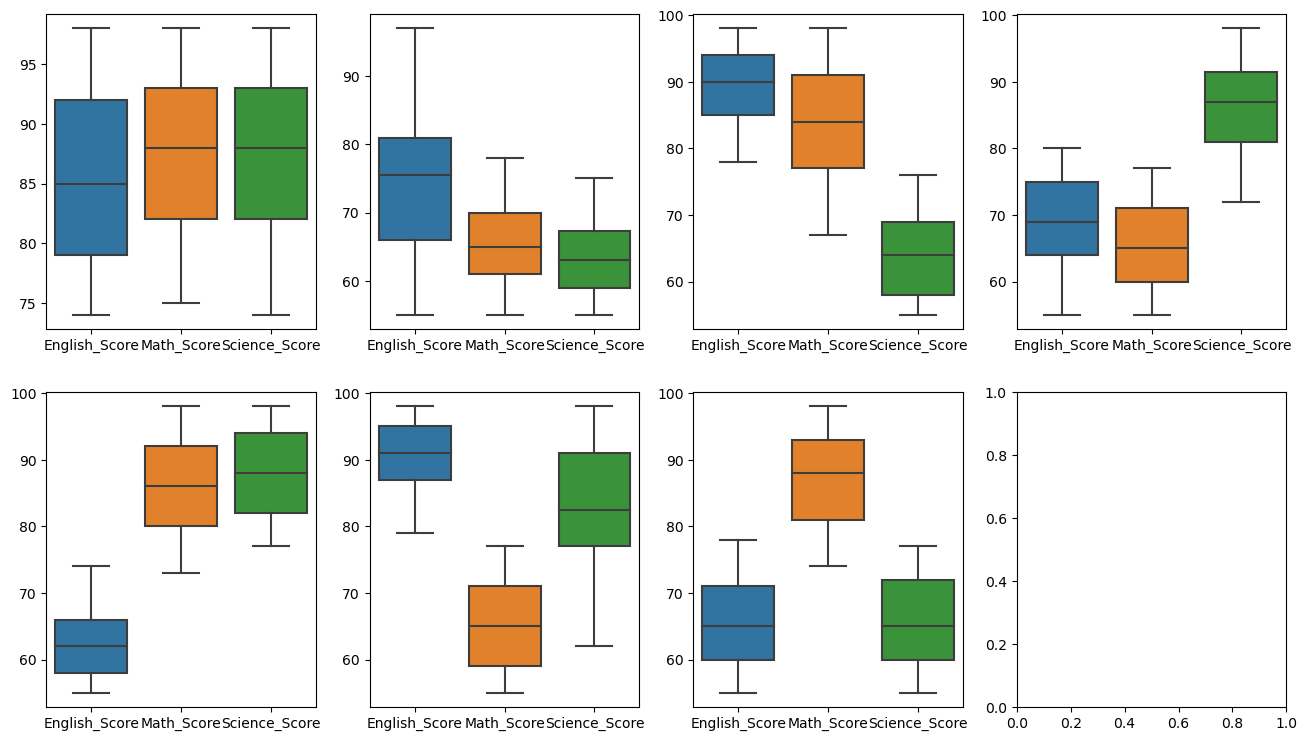

In [36]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2,4,figsize=(16,9))

sns.boxplot(dfUnscaled[dfUnscaled.kmeans == 0][['English_Score', 'Math_Score', 'Science_Score',]], ax=ax1)
sns.boxplot(dfUnscaled[dfUnscaled.kmeans == 1][['English_Score', 'Math_Score', 'Science_Score']], ax=ax2)
sns.boxplot(dfUnscaled[dfUnscaled.kmeans == 2][['English_Score', 'Math_Score', 'Science_Score']], ax=ax3)
sns.boxplot(dfUnscaled[dfUnscaled.kmeans == 3][['English_Score', 'Math_Score', 'Science_Score']], ax=ax4)
sns.boxplot(dfUnscaled[dfUnscaled.kmeans == 4][['English_Score', 'Math_Score', 'Science_Score']], ax=ax5)
sns.boxplot(dfUnscaled[dfUnscaled.kmeans == 5][['English_Score', 'Math_Score', 'Science_Score']], ax=ax6)
sns.boxplot(dfUnscaled[dfUnscaled.kmeans == 6][['English_Score', 'Math_Score', 'Science_Score']], ax=ax7)

plt.show()



<Axes: ylabel='Count'>

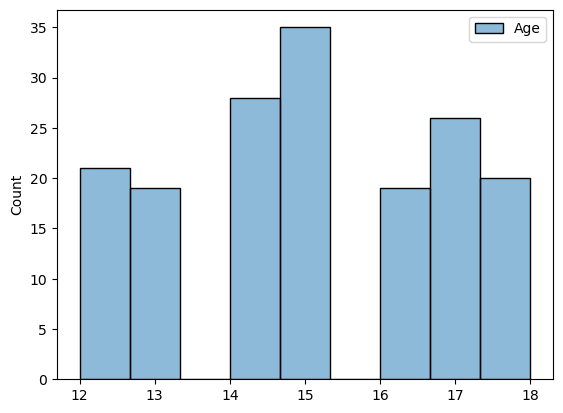

In [37]:
sns.histplot(dfUnscaled[dfUnscaled.kmeans == 1][['Age']])


Studets in Cluster 2 (Cluster thatneed most attention) are mostly 15

<b><u>Observations</u></b>
<ul>
<li>First Cluster: All High Scores</li>
<li>Second Cluster: English Score is moderate but Math & Science Score is low</li>
<li>Third Cluster: High English & Math Scores but low Science Score</li>
<li>Forth Cluster: Low English & Math Score but High Science Score</li>
<li>Fifth Cluster: High Math & Science Score but low English Score</li>
<li>Sixth Cluster: High English & Science Score but low Math Score</li>
<li>Seventh Cluster: High Math Score but low English & Science Score</li>

</ul>


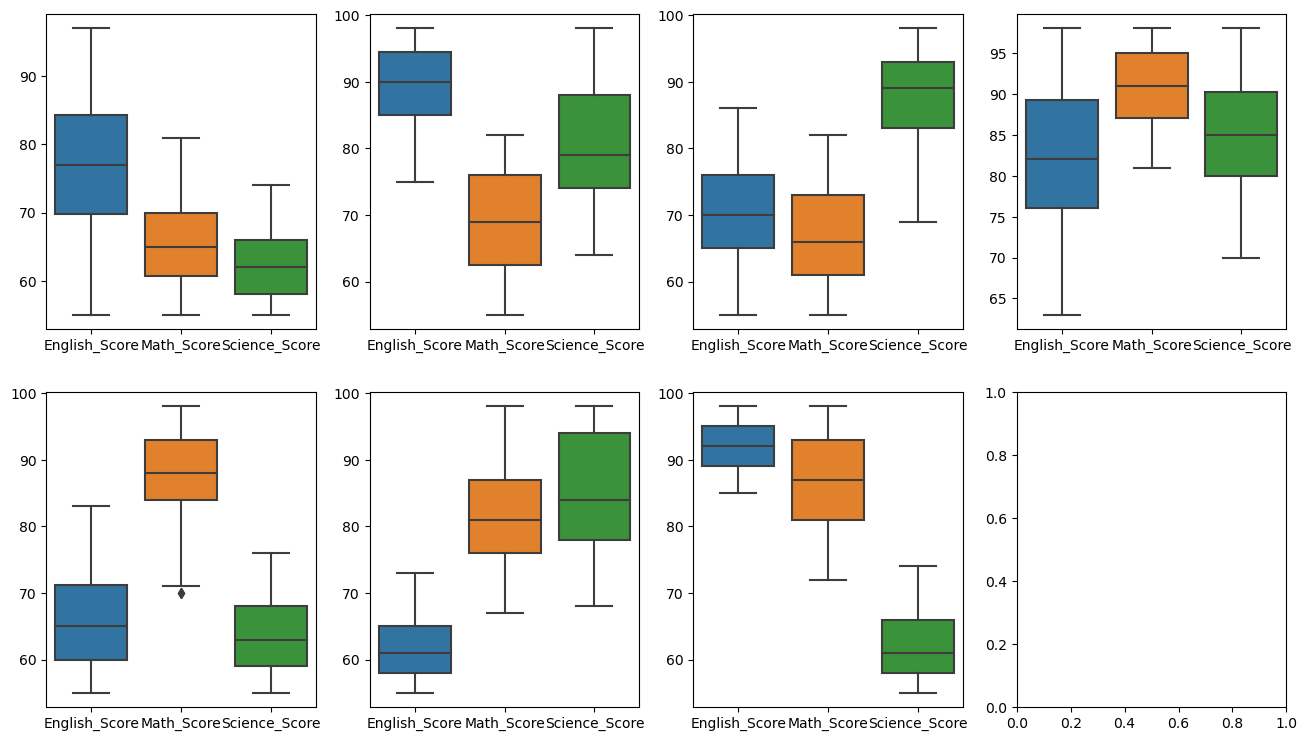

In [29]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2,4,figsize=(16,9))

sns.boxplot(dfUnscaled[dfUnscaled.hierarchical == 0][['English_Score', 'Math_Score', 'Science_Score']], ax=ax1)
sns.boxplot(dfUnscaled[dfUnscaled.hierarchical == 1][['English_Score', 'Math_Score', 'Science_Score']], ax=ax2)
sns.boxplot(dfUnscaled[dfUnscaled.hierarchical == 2][['English_Score', 'Math_Score', 'Science_Score']], ax=ax3)
sns.boxplot(dfUnscaled[dfUnscaled.hierarchical == 3][['English_Score', 'Math_Score', 'Science_Score']], ax=ax4)
sns.boxplot(dfUnscaled[dfUnscaled.hierarchical == 4][['English_Score', 'Math_Score', 'Science_Score']], ax=ax5)
sns.boxplot(dfUnscaled[dfUnscaled.hierarchical == 5][['English_Score', 'Math_Score', 'Science_Score']], ax=ax6)
sns.boxplot(dfUnscaled[dfUnscaled.hierarchical == 6][['English_Score', 'Math_Score', 'Science_Score']], ax=ax7)

plt.show()

<Axes: ylabel='Count'>

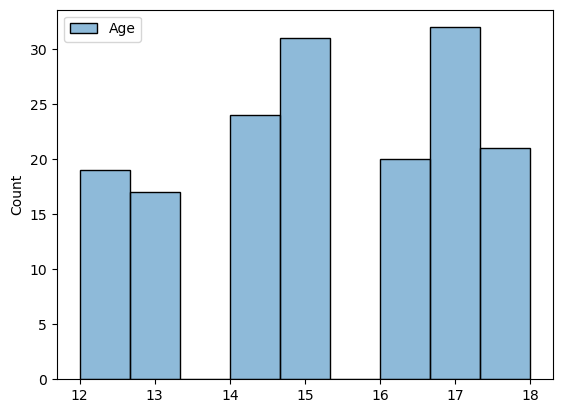

In [39]:
sns.histplot(dfUnscaled[dfUnscaled.hierarchical == 0][['Age']])

Studets in Cluster 1 (Cluster thatneed most attention) are mostly 17 and 15

<b><u>Observations</u></b>
<ul>
<li>First Cluster: Moderate English Score & Low Math & Science Score</li>
<li>Second Cluster: High English Score , Moderate Science Score & Math Score is low</li>
<li>Third Cluster: High Science Score but low Math & Science Score</li>
<li>Forth Cluster: All High Scores</li>
<li>Fifth Cluster: High Math Score but low English & Science Score</li>
<li>Sixth Cluster: High Math & Science Score but low English Score</li>
<li>Seventh Cluster: High English & Math Score but low Science Score</li>

</ul>


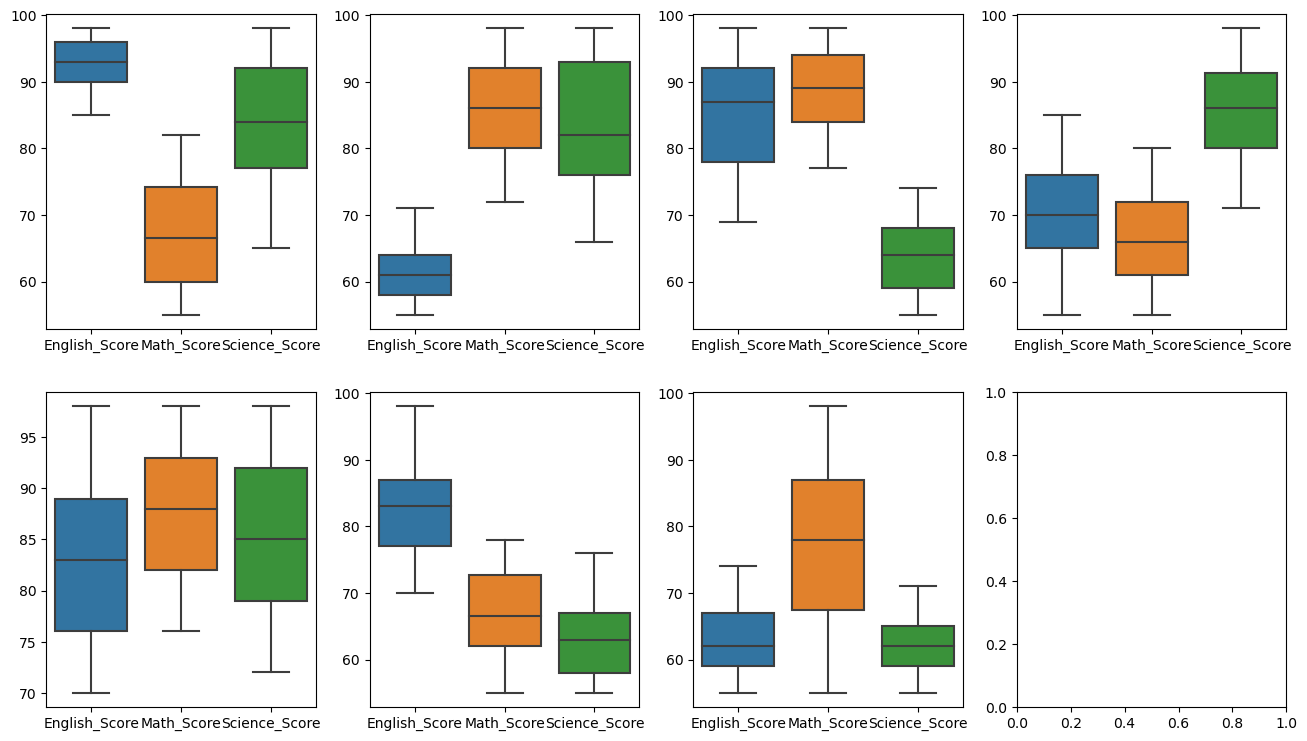

In [30]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2,4,figsize=(16,9))

sns.boxplot(dfUnscaled[dfUnscaled.gmm == 0][['English_Score', 'Math_Score', 'Science_Score']], ax=ax1)
sns.boxplot(dfUnscaled[dfUnscaled.gmm == 1][['English_Score', 'Math_Score', 'Science_Score']], ax=ax2)
sns.boxplot(dfUnscaled[dfUnscaled.gmm == 2][['English_Score', 'Math_Score', 'Science_Score']], ax=ax3)
sns.boxplot(dfUnscaled[dfUnscaled.gmm == 3][['English_Score', 'Math_Score', 'Science_Score']], ax=ax4)
sns.boxplot(dfUnscaled[dfUnscaled.gmm == 4][['English_Score', 'Math_Score', 'Science_Score']], ax=ax5)
sns.boxplot(dfUnscaled[dfUnscaled.gmm == 5][['English_Score', 'Math_Score', 'Science_Score']], ax=ax6)
sns.boxplot(dfUnscaled[dfUnscaled.gmm == 6][['English_Score', 'Math_Score', 'Science_Score']], ax=ax7)

plt.show()

<Axes: ylabel='Count'>

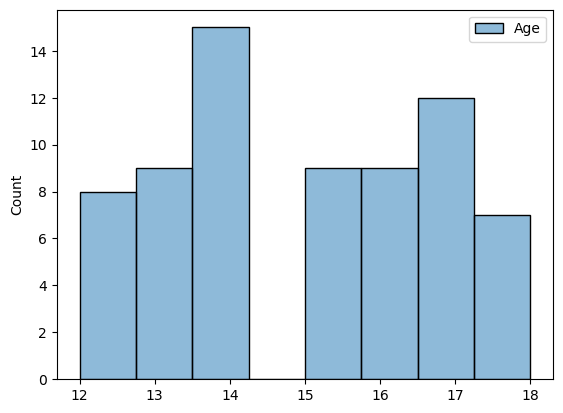

In [40]:
sns.histplot(dfUnscaled[dfUnscaled.hierarchical == 6][['Age']])

Studets in Cluster 7 (Cluster thatneed most attention) are mostly 14

<b><u>Observations</u></b>
<ul>
<li>First Cluster: High English & Science Score but low Math Score</li>
<li>Second Cluster: High Math & Science Score but low English Score</li>
<li>Third Cluster: High English & Math Score but low Science Score</li>
<li>Forth Cluster: High Science Score but low English & Math Score</li>
<li>Fifth Cluster: All High Scores</li>
<li>Sixth Cluster: High English Score but low Math & Science Score</li>
<li>Seventh Cluster: Moderate Math Score but low English & Science Score</li>

</ul>


<h3>Final Model</h3>

From Above, the model with the highest Silhouette Score is  KMeans Clustering of exactly `0.28134664414734145`.
<hr></hr>


### Cluster Visualisation

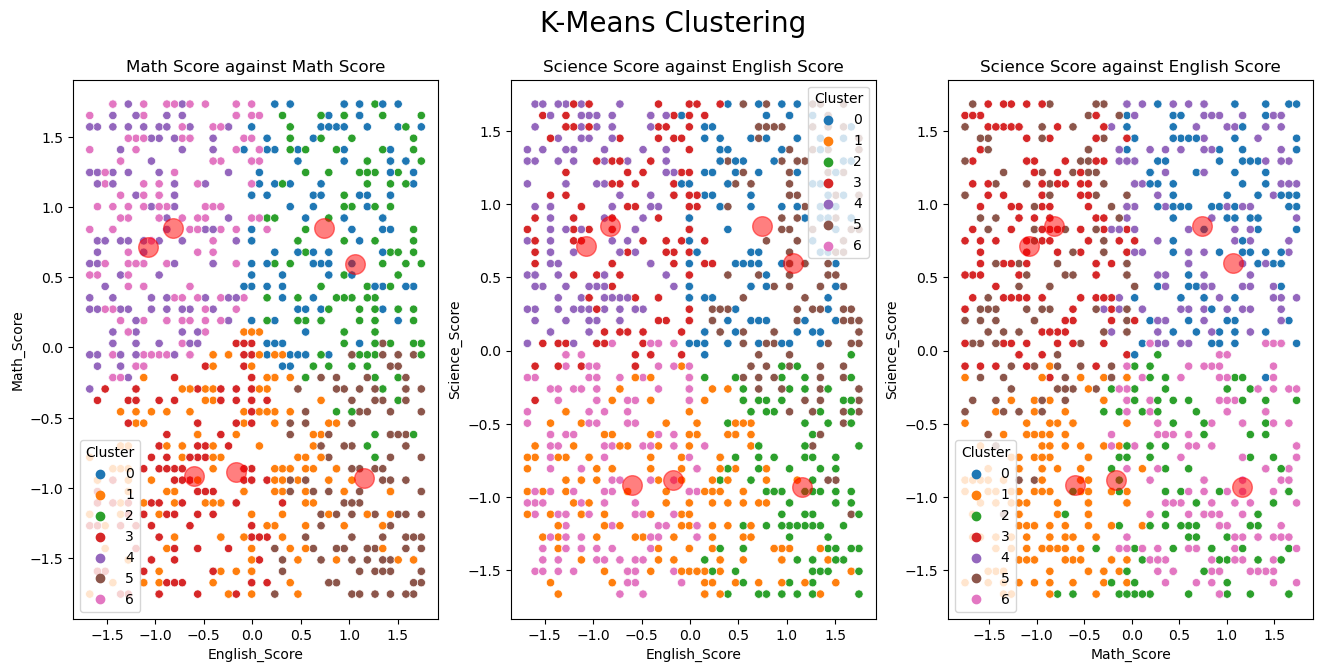

In [31]:

# Defining the model
kmeans = KMeans(n_clusters=7,n_init=10,random_state=0)
 
df1["Cluster"] = kmeans.fit_predict(df)

# Plotting the clusters
fig, (ax1, ax2 , ax3) = plt.subplots(1, 3, figsize = (16,7))
plt.suptitle("K-Means Clustering", fontsize=20)

# Plotting Age against Spending Score
sns.scatterplot(x = 'English_Score', y='Math_Score', hue = df1["Cluster"], palette = 'tab10', data = df1, ax = ax1)
ax1.set_title("Math Score against Math Score")

# Plotting Income (k$) against Spending Score
sns.scatterplot(x = 'English_Score', y='Science_Score', hue = df1["Cluster"], palette = 'tab10', data = df1, ax = ax2)
ax2.set_title("Science Score against English Score")

# Plotting Age against Spending Score
sns.scatterplot(x = 'Math_Score', y='Science_Score', hue = df1["Cluster"], palette = 'tab10', data = df1, ax = ax3)
ax3.set_title("Science Score against English Score")

centers = kmeans.cluster_centers_
ax1.scatter(centers[:, 0], centers[:, 1], c = 'red', s = 200, alpha = 0.5); # plot the x and y-coordinates
ax2.scatter(centers[:, 0], centers[:, 1], c = 'red', s = 200, alpha = 0.5); 
ax3.scatter(centers[:, 0], centers[:, 1], c = 'red', s = 200, alpha = 0.5); # plot the x and y-coordinates

plt.show()

### Cluster Sizes

In [32]:
# Get cluster labels
cluster_labels = kmeans.labels_

# Count the number of data points in each cluster
cluster_sizes = np.bincount(cluster_labels)

# Print cluster sizes
for cluster_id, size in enumerate(cluster_sizes):
    print(f"Cluster {cluster_id + 1}: {size} data points")

Cluster 1: 133 data points
Cluster 2: 168 data points
Cluster 3: 129 data points
Cluster 4: 155 data points
Cluster 5: 130 data points
Cluster 6: 132 data points
Cluster 7: 153 data points


In [33]:
# Get cluster centroids
centroids = kmeans.cluster_centers_

# Calculate pairwise distances between centroids
centroid_distances = pairwise_distances(centroids)

# Print centroid distances
print("Pairwise distances between centroids:")
print(centroid_distances)

Pairwise distances between centroids:
[[0.         2.69376045 1.86034602 2.21985567 1.82178596 1.85842847
  2.29693159]
 [2.69376045 0.         1.93007846 1.83288478 2.64426851 2.0255145
  1.86428377]
 [1.86034602 1.93007846 0.         2.85013969 2.84406024 2.14381007
  1.90795676]
 [2.21985567 1.83288478 2.85013969 0.         1.70209215 1.77215622
  2.40964178]
 [1.82178596 2.64426851 2.84406024 1.70209215 0.         2.79592052
  1.76380005]
 [1.85842847 2.0255145  2.14381007 1.77215622 2.79592052 0.
  2.99500373]
 [2.29693159 1.86428377 1.90795676 2.40964178 1.76380005 2.99500373
  0.        ]]


<h2>Conclusion</h2>
<hr>

#### I used 3 Clustering Models , KMeans Clustering , Hierarchical Clustering and GMM Clustering for student segmentation

#### From the Characteristics of the KMeans Cluster, student in Cluster 2 will need to be needing more attention to.This is because they do not have one high score , only 1 Moderate and 2 Lows.